# seaborn package

This notebook is based on https://qiita.com/hik0107/items/3dc541158fceb3156ee0

**seaborn** is a python package for data viaualization. It is a wrapper of **matplotlib**. matplotlib has many features, but it requires  many parameter to use. seaborn is included in Anaconda.

In [1]:
# setup

import numpy as np
import pandas as pd
import seaborn as sns

x = np.random.normal(size=100) #create random data of numpy array

titanic = sns.load_dataset("titanic") ## Titanic servivor's data from kaggle
tips = sns.load_dataset("tips")  ## 
iris = sns.load_dataset("iris")  ## 

In [2]:
# seaborn use Pandas dataframe

print('data type is:', type(tips))
tips.head()

data type is: <class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/kato/Miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


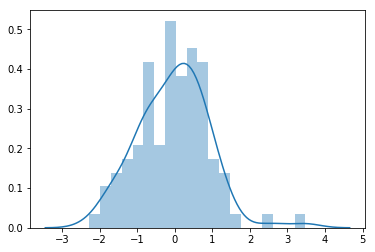

In [3]:
# Histgram. change arguments and see what happens

# sns.distplot(x, kde=False, rug=False, bins=10)
sns.distplot(x, kde=True, rug=False, bins=20)

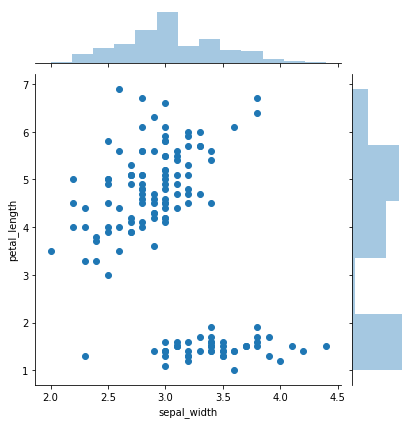

In [4]:
# Scatter plot

sns.jointplot('sepal_width', 'petal_length', data=iris)

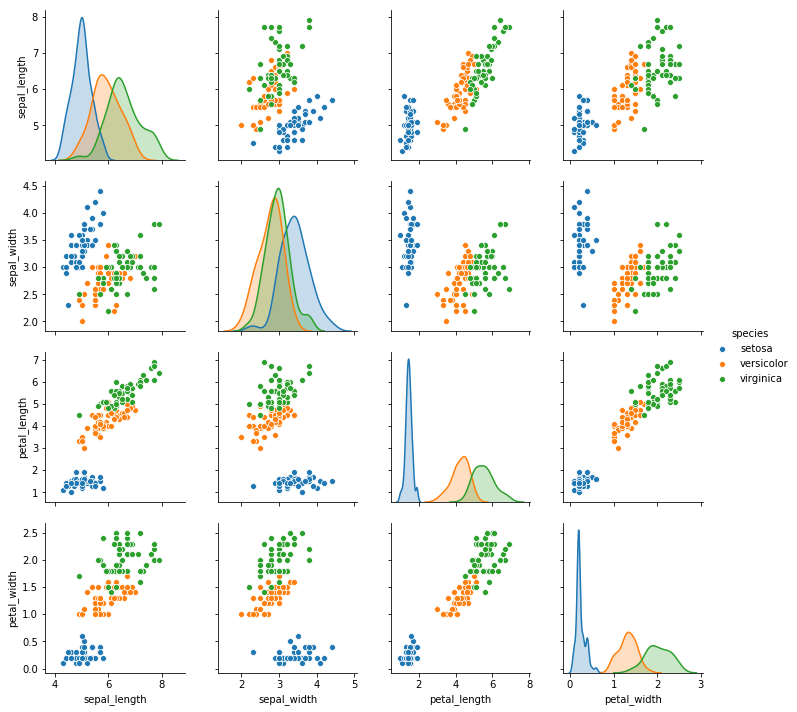

In [5]:
# Scatter plot of variable combination

# sns.pairplot(iris)
sns.pairplot(iris, hue='species')

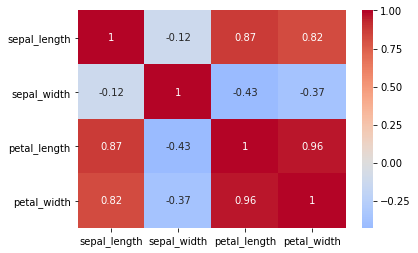

In [6]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.heatmap(iris[features].corr(), center=0, cmap='coolwarm', annot=True)

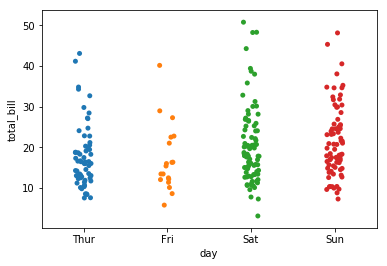

In [7]:
# Distribution (stripplot)

sns.stripplot(x="day", y="total_bill", data=tips)

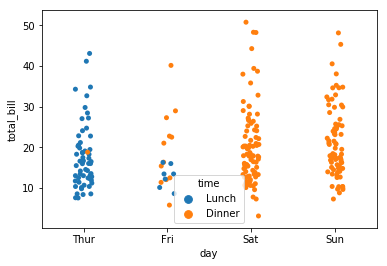

In [8]:
# separate lunch and dinner

sns.stripplot(x="day", y="total_bill", data=tips, hue='time')

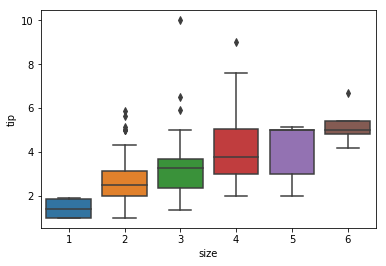

In [9]:
sns.boxplot(x="size", y="tip", data=tips.sort_values('size'))

### Color palette management

Please refer http://seaborn.pydata.org/tutorial/color_palettes.html

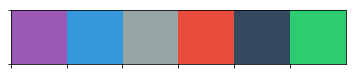

In [10]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

sns.palplot(sns.color_palette(flatui))
sns.set_palette(flatui)

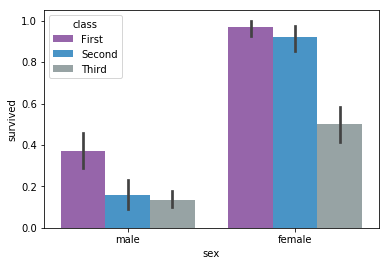

In [11]:
# Histgram (barplot)

# survivors ratio
sns.barplot(x='sex', y='survived', data=titanic, hue='class')

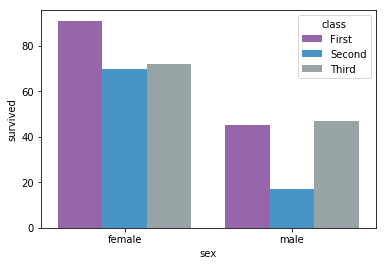

In [12]:
# total survivors

titanic_grpby = titanic.groupby( ['sex', 'class'])
titanic_data_for_graph = titanic_grpby['survived'].aggregate(sum).reset_index()

sns.barplot(x='sex', y='survived', hue= 'class', data=titanic_data_for_graph)

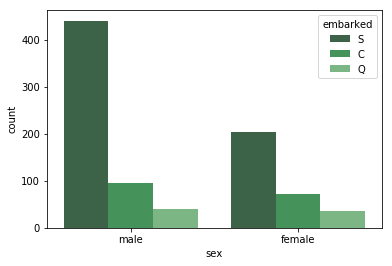

In [13]:
# count number of data (countplot)

sns.countplot(x='sex', hue='embarked', data=titanic, palette='Greens_d')